In [1]:
!pip install hdbscan -q

## Load in

In [16]:
import pandas as pd
import numpy as np
from ast import literal_eval
from hdbscan import HDBSCAN
from sklearn.manifold import TSNE
from utils import get_selection_cut_histograms_and_power, get_selection_cut_histograms_and_power_mit, get_selection_cut_histograms_and_power_mit_curated
import matplotlib.pyplot as plt
import matplotlib
from ast import literal_eval

In [17]:
def list_conv(string): return np.fromstring(string[1:-1], dtype=float, sep=' ')

In [4]:
df = pd.read_csv("df_with_final_MST_drop_scores.csv", converters={"paper_titles": literal_eval, "sub_lattice_structure": literal_eval, "arr_drop_values": list_conv}, index_col="material_id")
df = df.drop(["sub_lattice_structure", "flat", "Cluster_ID", "cluster_size", "dbcv_cluster", "probabilities", "paper_titles", "drop_values"], axis=1)
df_fingerprint = pd.read_csv("df_fingerprint.csv", index_col="material_id")

In [5]:
df_fingerprint

,structure_fingerprint_0,structure_fingerprint_1,structure_fingerprint_2,structure_fingerprint_3,structure_fingerprint_4,structure_fingerprint_5,structure_fingerprint_6,structure_fingerprint_7,structure_fingerprint_8,structure_fingerprint_9,...,structure_fingerprint_239,structure_fingerprint_240,structure_fingerprint_241,structure_fingerprint_242,structure_fingerprint_243,primary_sublattice_score,space_group_symbol,space_group_number,crystal_system,point_group
material_id,,,,,,,,,,,,,,,,,,,,,
mp-1184331,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0,0.943829,Pm-3m,221,Cubic,m-3m
mp-1184332,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0,0.966263,Pm-3m,221,Cubic,m-3m
mp-1184338,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0,0.963595,I4/mmm,139,Tetragonal,4/mmm
mp-1184339,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0,0.944801,Fm-3m,225,Cubic,m-3m
mp-1184340,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0,0.746928,Fm-3m,225,Cubic,m-3m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-780423,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001199,0.000000,...,0,0.0,0.0,0.0,0,0.686138,Pna2_1,33,Orthorhombic,mm2
mp-780424,0.001575,0.0,0.001575,0.001575,0.001575,0.0,0.001575,0.001575,0.379533,0.000000,...,0,0.0,0.0,0.0,0,NaN,P2_12_12_1,19,Orthorhombic,222
mp-780426,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0,0.930073,Fd-3,203,Cubic,m-3


In [6]:
df = pd.merge(df, df_fingerprint, left_index=True, right_index=True, how='inner')
print(df.columns[:14])
fingerprint_cols = [col for col in df.columns if "structure_fingerprint" in col]

Index(['flat_segments', 'formula', 'synth_score', 'sublattice_element',
       'experimentally_observed', 'band_gap', 'synth_score_2',
       'matched_to_a_sc', 'SC_doped_from_original', 'arr_drop_values',
       'average_drop', 'max_drop', 'min_drop', 'w_av_drop'],
      dtype='object')


In [7]:
# Keep every other row starting from the first row
df_unique = df.iloc[::2]
print(len(df_unique.index))
print(len(np.unique(df_unique.index)))


24828
24828


In [8]:
converters = {col:literal_eval for col in
              ['rcsr_name', 'icsd_id', 'systre_key', 'systre_spacegroup', 'spacegroup', 'spacegroup_number', 'fb_lattice_dimensionality', 'fb_lattice_ids']}

In [9]:
df_sublattices = pd.read_csv("mit_info.csv", index_col="material_id", converters=converters)
# df_sublattices.rename(columns={'MP ID': "material_id", "FB Sublattice": "sublattice_element"}, inplace=True)
# df_sublattices.set_index("material_id", inplace=True)
#df_sublattices.head()
print(len(df_sublattices.index))
print(len(np.unique(df_sublattices.index)))

82011
63144


In [10]:
df_merged = df_unique.merge(df_sublattices, how="left", left_on=[df_unique.index, "sublattice_element"], right_on=[df_sublattices.index, "sublattice_element"])
# merged_df = merged_df[merged_df['sublattice_element_df1'] == merged_df['sublattice_element_df2']]
df_merged.rename(columns={"key_0":"material_id"}, inplace=True)
df_merged.set_index("material_id", inplace=True)
print(len(df_merged[~df_merged.rcsr_name.isna()].index))
print(len(np.unique(df_merged[~df_merged.rcsr_name.isna()].index)))
df_merged

8007
8007


,flat_segments,formula,synth_score,sublattice_element,experimentally_observed,band_gap,synth_score_2,matched_to_a_sc,SC_doped_from_original,arr_drop_values,...,point_group,rcsr_name,icsd_id,systre_key,systre_spacegroup,mit_sublattice_spacegroup_numbers,fb_lattice_dimensionality,fb_lattice_ids,mit_sublattice_spacegroups,curated
material_id,,,,,,,,,,,,,,,,,,,,,
mp-1001024,[4],Y2MgS4,0.380295,S,False,1.7768,0.984559,False,NaN,"[0.92351548, 0.75931422, 0.75931449, 0.7556686...",...,m-3m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-1001079,[3],Li(CN)2,0.534360,N,False,1.6458,0.490698,False,NaN,"[0.98078508, 0.98933628, 0.98078058, 0.9448538...",...,2/m,[[None]],[-1],[[NN_COLLISION]],[[None]],[12],[[1]],[[LI-5]],"[[""C2/m""]]",False
mp-1001080,[4],H2CO3,0.812061,O,False,5.6848,0.749909,False,NaN,"[0.87126895, 0.87623015, 0.86034323, 0.8859516...",...,mmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-1001112,"[3, 4]",Na2H3CO6,0.629955,O,False,3.5954,0.762945,False,NaN,"[0.89055511, 0.89102679, 0.88547396, 0.9444690...",...,mmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-1003315,"[1, 2, 3]",LiMn4O8,0.834009,Mn,False,0.1380,0.161159,False,NaN,"[0.97255514, 0.97671636, 0.97294329, 0.9765924...",...,2/m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-998917,[3],K2O2,0.022630,O,False,2.0834,0.432028,False,NaN,"[0.81562138, 0.99147924, 0.81502886, 0.9913421...",...,-6m2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-998929,"[3, 4]",K2O,0.242943,O,False,1.8534,0.017624,False,NaN,"[-0.33389066, 0.32143169, 0.34248083, -0.14283...",...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-999290,[3],PuCoC2,0.438483,Pu,True,0.0000,0.977292,False,NaN,"[0.97998451, 0.98009828, 0.98061645, 0.9797640...",...,mm2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Perform Selection Cuts

In [11]:
df_merged["std_drop"] = df_merged.arr_drop_values.apply(np.std)

In [12]:
range = (0.55, 1)

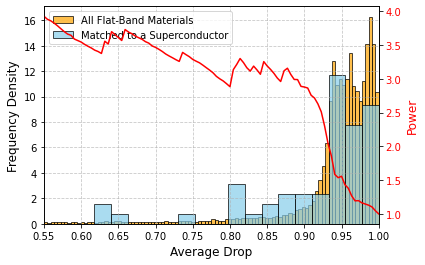

In [13]:
ax = get_selection_cut_histograms_and_power("average_drop", df_merged, log_scale=False, power=True, range_=range)
ax.set_xlabel("Average Drop", fontsize=12)
plt.savefig("figs/histogram_sc.png", bbox_inches="tight", dpi=500)

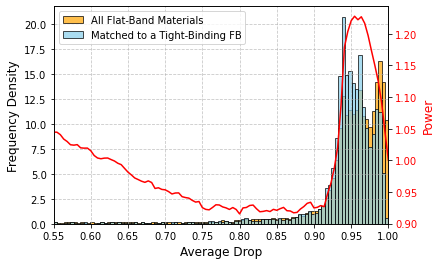

In [14]:
ax = get_selection_cut_histograms_and_power_mit("average_drop", df_merged, power=True, range_=range)
ax.set_xlabel("Average Drop", fontsize=12)
plt.savefig("figs/histogram_mit.png", bbox_inches="tight", dpi=500)

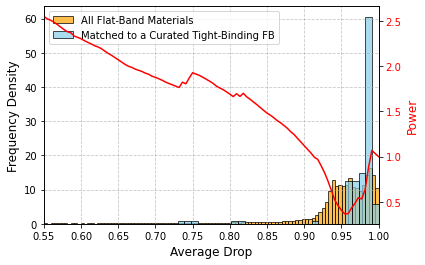

In [15]:
ax = get_selection_cut_histograms_and_power_mit_curated("average_drop", df_merged, power=True, range_=range, N_bins_metric=50)
ax.set_xlabel("Average Drop", fontsize=12)
plt.savefig("figs/histogram_mit_curated.png", bbox_inches="tight", dpi=500)

In [22]:
CUT_COLUMN = "average_drop"
CUT_VALUE = 0.6944

In [11]:
df_cut = df_merged.copy()
df_cut = df_merged[df_merged[CUT_COLUMN] < CUT_VALUE]
print(len(np.unique(df_cut.index)))

1773


In [12]:
def doesnt_contain_actinide_or_lanthanide(formula):
    # Actinides
    actinides = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']

    # Lanthanides
    lanthanides = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    
    both = actinides + lanthanides
    
    for element in both:
        if element in formula:
            return False
        
    return True

In [13]:
df_cut = df_cut[df_cut.sublattice_element.apply(doesnt_contain_actinide_or_lanthanide)]
print(len(np.unique(df_cut.index)))

1635


## Cluster with HDBSCAN

In [14]:
clusterer = HDBSCAN()
clusterer.fit(df_cut[fingerprint_cols])

HDBSCAN()

In [20]:
clusterer = HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=6, min_samples=5, p=0.2)
clusterer.fit(df_cut[fingerprint_cols])

HDBSCAN(cluster_selection_method='leaf', metric='minkowski', min_cluster_size=6,
        min_samples=5, p=0.2)

## View with TSNE

In [16]:
#x_y = TSNE(perplexity=15, verbose=2).fit_transform(df_cut[fingerprint_cols])
n_components = 2
tsne = TSNE(n_components=n_components, early_exaggeration=12.0, init="pca", learning_rate=100, random_state=None, perplexity=40, n_iter=10000, verbose=2)
x_y = tsne.fit_transform(df_cut[fingerprint_cols])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1635 samples in 0.001s...
[t-SNE] Computed neighbors for 1635 samples in 0.380s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1635
[t-SNE] Computed conditional probabilities for sample 1635 / 1635
[t-SNE] Mean sigma: 0.352300
[t-SNE] Computed conditional probabilities in 0.115s


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 67.6690826, gradient norm = 0.0018805 (50 iterations in 1.186s)
[t-SNE] Iteration 100: error = 67.6589661, gradient norm = 0.0001414 (50 iterations in 1.108s)
[t-SNE] Iteration 150: error = 67.6577606, gradient norm = 0.0001281 (50 iterations in 1.119s)
[t-SNE] Iteration 200: error = 67.6576691, gradient norm = 0.0001249 (50 iterations in 1.171s)
[t-SNE] Iteration 250: error = 67.6575546, gradient norm = 0.0001689 (50 iterations in 1.098s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.657555
[t-SNE] Iteration 300: error = 1.1263057, gradient norm = 0.0011830 (50 iterations in 1.006s)
[t-SNE] Iteration 350: error = 0.9604638, gradient norm = 0.0004065 (50 iterations in 1.017s)
[t-SNE] Iteration 400: error = 0.9077529, gradient norm = 0.0002258 (50 iterations in 1.104s)
[t-SNE] Iteration 450: error = 0.8866655, gradient norm = 0.0001605 (50 iterations in 1.087s)
[t-SNE] Iteration 500: error = 0.8768241, gradient norm = 0.0001348 (50 

In [ ]:
labels = clusterer.labels_
df_cut["labels"] = labels

In [ ]:
# read in saved frame

In [18]:
df_cut = pd.read_csv("df_cut_average_drop=0.6944_MS5_MC6_PERPLXTY40.csv", converters={"paper_titles": literal_eval, "sub_lattice_structure": literal_eval, "arr_drop_values": list_conv, "labels": literal_eval, "fx": literal_eval, "fy": literal_eval}, index_col="material_id")

In [15]:
!jupyter labextension install jupyter-matplotlib

SyntaxError: invalid syntax (1642669591.py, line 1)

In [27]:
!pip install --upgrade ipympl matplotlib -q

In [19]:
from ipywidgets import interact
import ipywidgets as widgets

%matplotlib ipympl

[-23.73346138  -5.34543085]


/tmp/ipykernel_764/2731384154.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo')


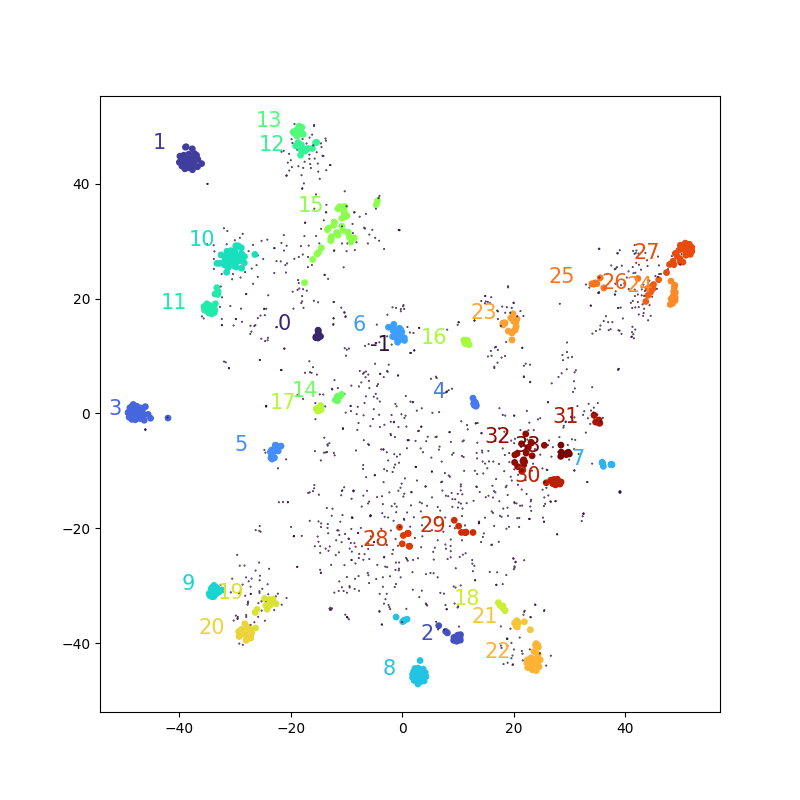

In [20]:
# fig, ax = plt.subplots(figsize=(15, 15))

# min_label = clusterer.labels_.min()
# max_label = clusterer.labels_.max()

# for label in range(min_label, max_label+1):
#     points = x_y[clusterer.labels_ == label]
#     ax.scatter(*(points.T), label=label, s=3)

labels = df_cut["labels"].to_numpy()
#print(labels)
x_y = np.array([[df_cut["fx"][i], df_cut["fy"][i]] for i in range(len(df_cut["fx"]))])
print(x_y[2]+[1,1])

fig = plt.figure(figsize=(8,8))
size=np.ones((len(labels),1))*15
size[labels==-1]=0.2
 
unique_label,cluster_rep_index, counts = np.unique(labels, return_index=True, return_counts=True)
cmap = plt.cm.get_cmap('turbo')
norm = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
    
for rep_id in cluster_rep_index:
        col=cmap(norm(labels[rep_id]))
        plt.annotate(labels[rep_id],x_y[rep_id]+[-6,1],color=col,alpha=1, weight='normal', ha='center', va='center', size=15).draggable()

plt.scatter(x_y[:,0], x_y[:,1],s=size, c=labels*5, cmap="turbo")

## Add labels, tsne to df and save

In [24]:
df_cut.loc[:, ["fx", "fy"]] = x_y
df_cut.loc[:, "labels"] = clusterer.labels_
df_cut.loc[:, "member_strength"] = clusterer.probabilities_

In [25]:
df_cut.to_csv(f"df_cut_{CUT_COLUMN}={CUT_VALUE}_MS5_MC6_PERPLXTY40.csv")

In [23]:
fig.savefig(f"figs/cut_{CUT_COLUMN}={CUT_VALUE}.png")

## Exploring Clusters

In [16]:
df_cut.head()

,flat_segments,formula,synth_score,sublattice_element,experimentally_observed,band_gap,synth_score_2,matched_to_a_sc,SC_doped_from_original,arr_drop_values,...,icsd_id,systre_key,systre_spacegroup,mit_sublattice_spacegroup_numbers,fb_lattice_dimensionality,fb_lattice_ids,mit_sublattice_spacegroups,curated,labels,member_strength
material_id,,,,,,,,,,,,,,,,,,,,,
mp-10049,"[2, 3]",MnAsRu,0.186726,Ru,True,0.0000,0.999736,False,NaN,"[0.57866975, 0.58142049, -0.03188355, 0.569930...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
mp-1006118,"[3, 4]",P2S7,0.078258,S,True,1.8903,0.999900,False,NaN,"[0.72421952, 0.72392507, 0.72029466, 0.9337170...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
mp-1006223,"[2, 3]",GdB12,0.422726,B,True,0.0000,1.000000,False,NaN,"[-0.00922721, -0.00529902, 0.01079692, -0.0053...",...,[614314],[[3 1 2 0 0 0 1 3 0 0 0 1 4 0 0 0 1 5 0 0 0 1 ...,[[Fm-3m]],[225],[[3]],[[SK-78]],"[[""Fm-3m""]]",True,-1,0.0
mp-10089,[4],Ba5Sb4,0.509703,Sb,True,0.2649,1.000000,False,NaN,"[0.44027633, 0.51960278, 0.41664252, 0.5176584...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
mp-1011696,"[3, 4]",Cs2Se,0.414296,Se,True,1.8027,1.000000,False,NaN,"[-0.16315645, -0.16198418, -0.16975996, -0.168...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0


In [23]:
df_cut.loc["mp-32586"]

flat_segments                    [4]
formula                        Nd2S3
synth_score                   0.9604
sublattice_element                 S
experimentally_observed        False
                             ...    
curated                          NaN
labels                             4
fx                         12.901407
fy                          1.422313
member_strength                  1.0
Name: mp-32586, Length: 276, dtype: object

In [9]:
interesting_cols = ["formula", "sublattice_element", "synth_score_2", "experimentally_observed", "matched_to_a_sc", "rcsr_name", "average_drop", "fb_lattice_ids", "member_strength"]
def show(i):
    display(df_cut.loc[df_cut.labels==i, interesting_cols])
    
interact(show, i=widgets.IntSlider(min=-1,max=len(np.unique(df_cut.labels)),step=1,value=0))

interactive(children=(IntSlider(value=0, description='i', max=35, min=-1), Output()), _dom_classes=('widget-in…

<function __main__.show(i)>

## Notable Clusters

20:
Full of fb sublattices, "crs" lattice mp-3925 linked to SC. Perhaps another "crs" cuprate should be investigated

In [50]:
display(df_cut.loc[df_cut.labels==3, interesting_cols])

,formula,sublattice_element,synth_score_2,experimentally_observed,matched_to_a_sc,rcsr_name,average_drop,fb_lattice_ids,member_strength
material_id,,,,,,,,,
mp-1016119,NaMnO2,Mn,0.996409,False,False,NaN,0.455391,NaN,0.011743
mp-1080570,CsNiBr3,Ni,1.000000,True,False,NaN,0.645375,NaN,0.487478
mp-1101091,Dy3(In2Co)2,Co,1.000000,True,False,NaN,0.574764,NaN,0.016827
mp-20296,In2Co,Co,0.999997,True,False,NaN,0.503213,NaN,0.011743
mp-22892,RuBr3,Ru,0.998195,True,False,NaN,0.616569,NaN,1.000000
mp-22977,CsVCl3,V,1.000000,True,False,NaN,0.656002,NaN,0.667103
mp-22991,CsVI3,V,1.000000,True,False,NaN,0.658362,NaN,1.000000
mp-23038,CsVBr3,V,1.000000,True,False,NaN,0.650897,NaN,1.000000
mp-23294,RuBr3,Ru,0.997635,True,False,NaN,0.573035,NaN,0.331163


In [31]:
df_cut.loc[["fb_lattice_ids"]==[['SK-12']]]

KeyError: 'False: boolean label can not be used without a boolean index'

25: A5B3 stochiemtry, with mp-505759 linked to a SC. Hf and Zr are chemically similar. See 

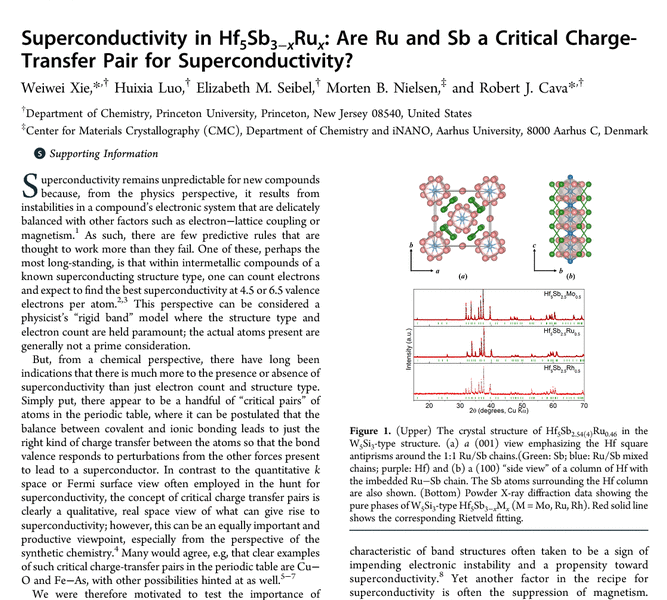

In [30]:
display(df_cut.loc[df_cut.labels==25, interesting_cols])

,formula,sublattice_element,synth_score_2,experimentally_observed,matched_to_a_sc,rcsr_name,average_drop,fb_lattice_ids
material_id,,,,,,,,
